In [1]:
!pip install shap


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import shap

In [3]:
df1 = pd.read_csv('Cleaned_Data.csv')
df1

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,NOC,Year,Sport,Winner
0,0,1,A Dijiang,0,24,180,80,CHN,1992,Basketball,0
1,1,2,A Lamusi,0,23,170,60,CHN,2012,Judo,0
2,2,3,Gunnar Nielsen Aaby,0,24,178,73,DEN,1920,Football,0
3,3,4,Edgar Lindenau Aabye,0,34,182,95,DEN,1900,Tug-Of-War,1
4,4,5,Christine Jacoba Aaftink,1,21,185,82,NED,1988,Speed Skating,0
...,...,...,...,...,...,...,...,...,...,...,...
196751,271110,135568,Olga Igorevna Zyuzkova,1,33,171,69,BLR,2016,Basketball,0
196752,271111,135569,Andrzej ya,0,29,179,89,POL,1976,Luge,0
196753,271112,135570,Piotr ya,0,27,176,59,POL,2014,Ski Jumping,0
196754,271114,135571,Tomasz Ireneusz ya,0,30,185,96,POL,1998,Bobsleigh,0


In [4]:
sports = ['Rowing', 'Athletics', 'Swimming', 'Cycling', 'Basketball']
sports

['Rowing', 'Athletics', 'Swimming', 'Cycling', 'Basketball']

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Influence_Rowing_Male


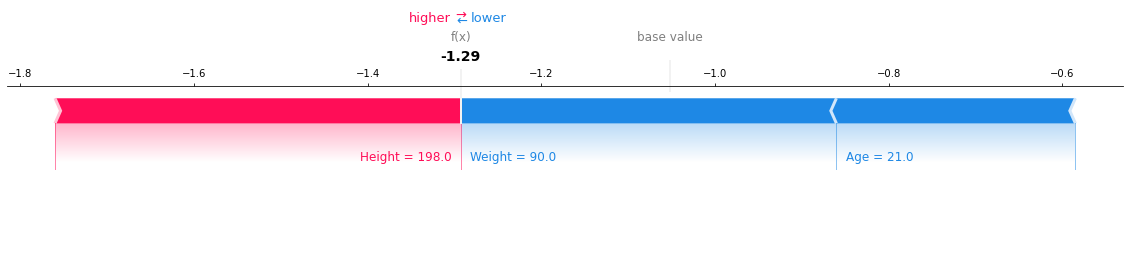

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Influence_Rowing_Female


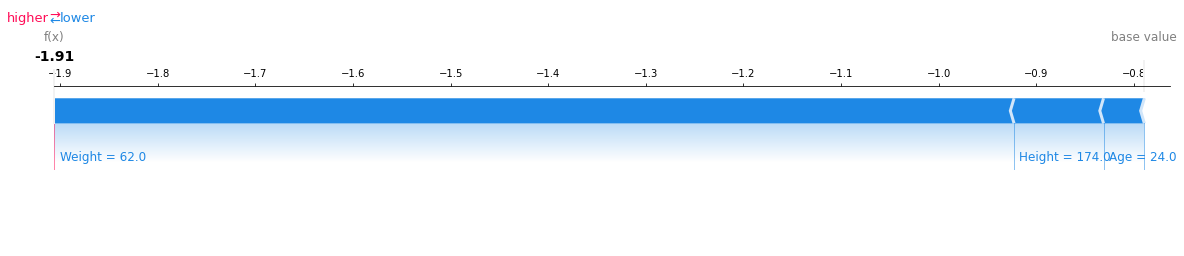

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Influence_Athletics_Male


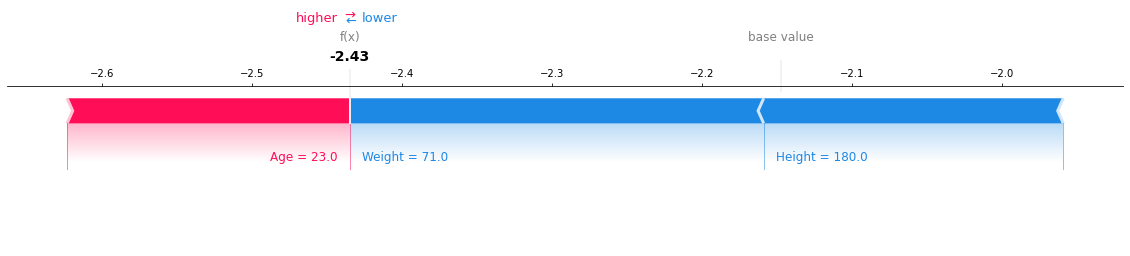

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Influence_Athletics_Female


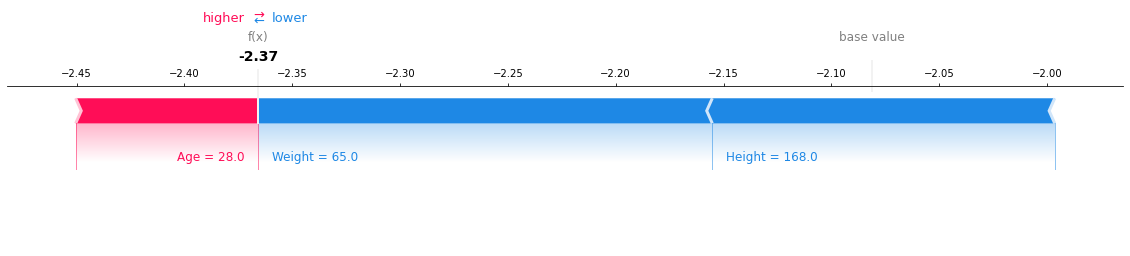

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Influence_Swimming_Male


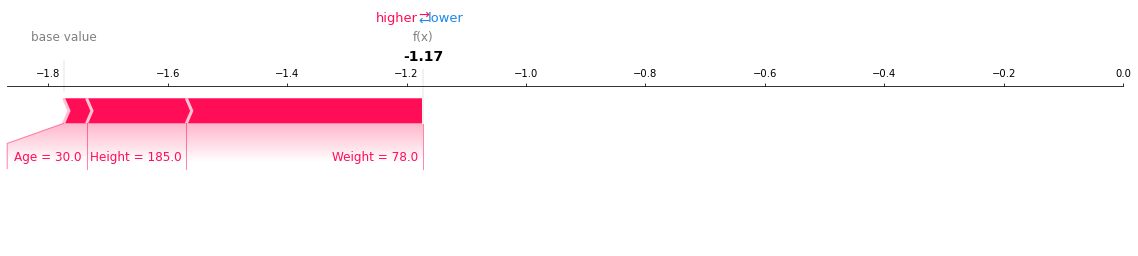

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Influence_Swimming_Female


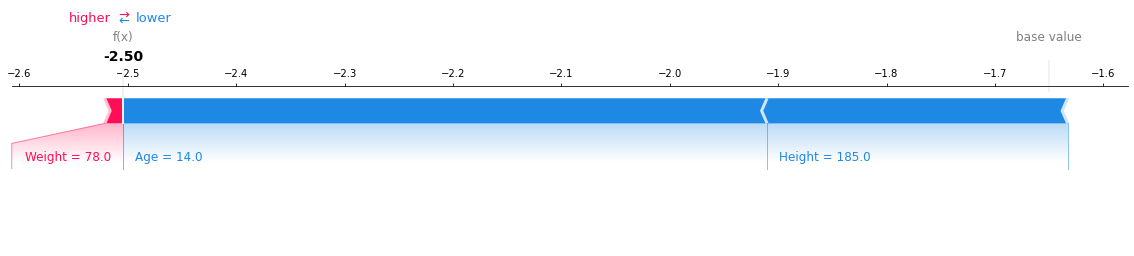

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Influence_Cycling_Male


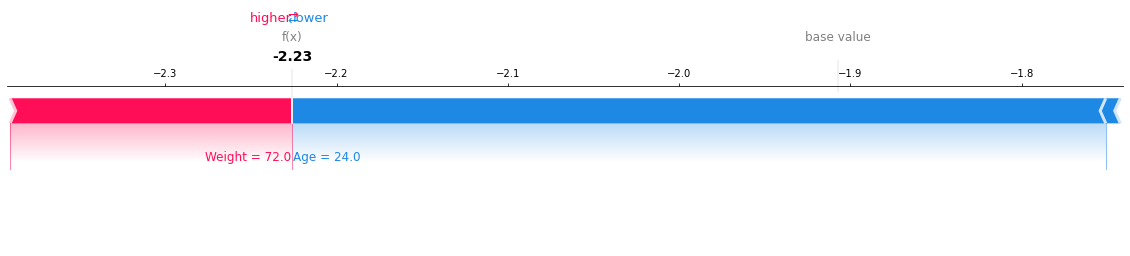

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Influence_Cycling_Female


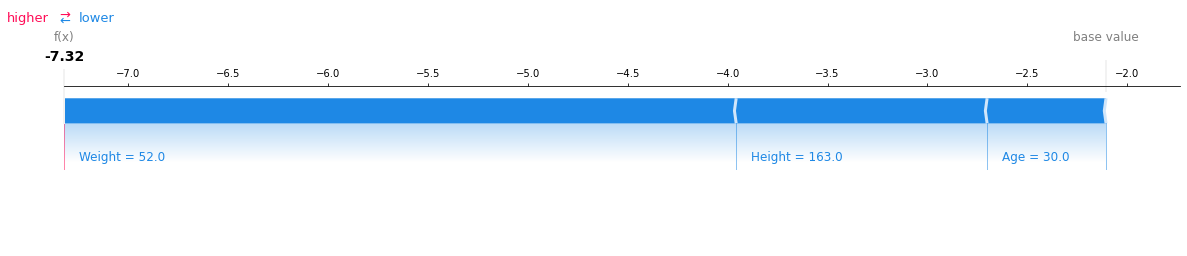

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Influence_Basketball_Male


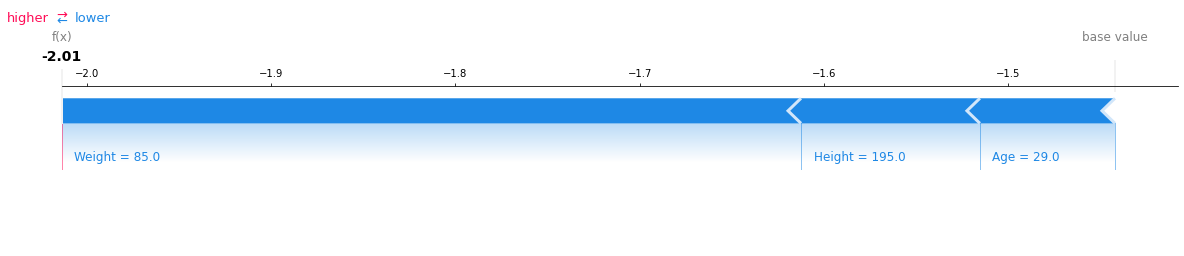

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Influence_Basketball_Female


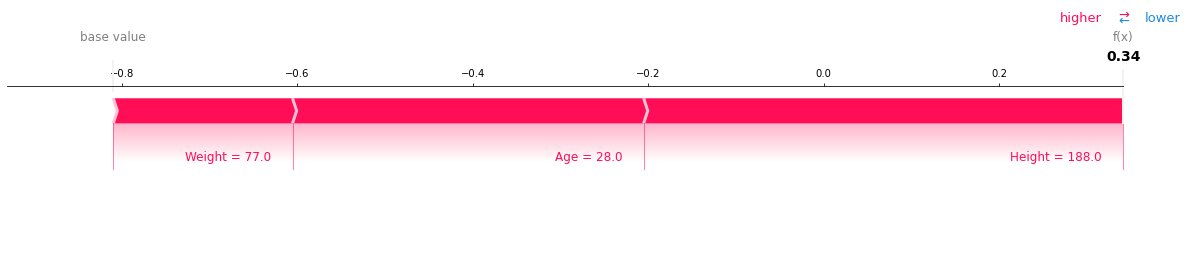

In [5]:
for s in sports:
    for g in range(2):

        # Processing Data:
        df2 = df1[(df1['Sport'] == s) & (df1['Sex'] == g)]
        df2 = df2.drop(columns = ['Sport', 'Unnamed: 0', 'ID', 'Name'])
        df2 = df2.drop(columns = ['NOC', 'Sex'])

        X_train = df2[df2['Year']<2016].drop(columns=['Winner', 'Year'])
        X_test = df2[df2['Year']==2016].drop(columns=['Winner', 'Year'])
        y_train = df2[df2['Year']<2016]['Winner']
        y_test = df2[df2['Year']==2016]['Winner']

        # Creating Model:
        xgb = XGBClassifier(random_state=42)
        xgb.fit(X_train, y_train)

        explainer = shap.TreeExplainer(xgb)
        data = df2.drop(columns=['Winner', 'Year'])

        # display(data)
        shap_values = explainer.shap_values(data)

        # Plot Results:
        
        
        if g==1:
            g = 'Female'
        else:
            g = 'Male'

        print('Influence_' + s + '_' + g)

        # Plot Influence on random Individual:
        shap.force_plot(explainer.expected_value, shap_values[2,:], data.iloc[2,:], show=True, matplotlib=True)

        # Plot Bar:
        """
        plt.grid(True)
        plt.title(s + ' '+ g, fontsize=20)
        plt.xlim(0, 1)
        shap.summary_plot(shap_values, X_test, plot_type='bar')
        """


        # Plot Violin:        
        """
        fig = shap.summary_plot(shap_values, data, feature_names=['Age', 'Height', 'Weight'], plot_type="violin", show=True)
        plt.title("bar")
        plt.show()
        """

None